###Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%reset -f

In [ ]:
!pip install tsfel

  Using cached tsfel-0.1.7-py3-none-any.whl (55 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
%matplotlib inline
import csv, tsfel, torch, string, joblib, pprint, warnings
import numpy as np, pandas as pd, random as rdm, seaborn as sns, tensorflow as tf
import matplotlib.pyplot as plt, torch.nn as nn, torch.nn.functional as F, torch.optim as optim

from scipy import stats
from typing import Union
from keras import layers
from sklearn.svm import SVC
from tensorflow import keras
from tqdm.notebook import tqdm
from collections import Counter
from sklearn.utils import shuffle
from xgboost import XGBClassifier
from scipy.signal import find_peaks
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import ADASYN
from tensorflow.keras.models import Model
from sklearn import preprocessing, datasets
from tensorflow.keras.utils import plot_model
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform, randint, uniform
from tensorflow.keras.callbacks import EarlyStopping
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, label_binarize, StandardScaler
from tensorflow.keras.layers import Input, Dense, Convolution1D, Activation, MaxPooling1D, Flatten, Dropout, LSTM
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, ConfusionMatrixDisplay

warnings.filterwarnings('ignore')

#Bachelor Tese Code

##Analysis

In [ ]:
train_df = pd.read_csv('drive/MyDrive/UFMG/TCC/Data/NSL KDD/KDDTrain+.txt', sep=",", header=None)
test_df = pd.read_csv('drive/MyDrive/UFMG/TCC/Data/NSL KDD/KDDTest+.txt', sep=",", header=None)

In [ ]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','target','level'])
train_df.columns = columns
test_df.columns = columns

In [ ]:
from tabulate import tabulate

# Definindo os dados
data = [['duration','protocol_type','service','flag','src_bytes'],
        ['dst_bytes','land','wrong_fragment','urgent','hot'],
        ['num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'],
        ['num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds'],
        ['is_host_login','is_guest_login','count','srv_count','serror_rate'],
        ['srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'],
        ['srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'],
        ['dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate'],
        ['dst_host_srv_rerror_rate','target','level']]

# Adicionando número para cada item
data_with_number = [[i+1] + row for i, row in enumerate(data)]

# Exibindo os dados como tabela
print(tabulate(data_with_number, headers=['Number', 'Data Features'], tablefmt='fancy_grid'))


╒════╤═════════════════════════════╤═════════════════════════════╤══════════════════════╤══════════════════════════╤════════════════════════╕
│    │                             │                             │                      │ Number                   │ Data Features          │
╞════╪═════════════════════════════╪═════════════════════════════╪══════════════════════╪══════════════════════════╪════════════════════════╡
│  1 │ duration                    │ protocol_type               │ service              │ flag                     │ src_bytes              │
├────┼─────────────────────────────┼─────────────────────────────┼──────────────────────┼──────────────────────────┼────────────────────────┤
│  2 │ dst_bytes                   │ land                        │ wrong_fragment       │ urgent                   │ hot                    │
├────┼─────────────────────────────┼─────────────────────────────┼──────────────────────┼──────────────────────────┼────────────────────────┤
│  3 │

In [ ]:
from tabulate import tabulate

# Definindo os dados
data = [['duration', 'protocol_type', 'service'],
        ['flag', 'src_bytes', 'dst_bytes'],
        ['land', 'wrong_fragment', 'urgent'],
        ['hot', 'num_failed_logins', 'logged_in'],
        ['num_compromised', 'root_shell', 'su_attempted'],
        ['num_root', 'num_file_creations', 'num_shells'],
        ['num_access_files', 'num_outbound_cmds', 'is_host_login'],
        ['is_guest_login', 'count', 'srv_count'],
        ['serror_rate', 'srv_serror_rate', 'rerror_rate'],
        ['srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate'],
        ['srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count'],
        ['dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate'],
        ['dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate'],
        ['dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target'],
        ['level', '', '']]

# Adicionando número para cada item
num_data = []
for i, row in enumerate(data):
    num_row = []
    for j, feature in enumerate(row):
        num_row.extend([i*3 + j + 1, feature])
    num_data.append(num_row)

# Exibindo os dados como tabela
print(tabulate(num_data, headers=['Number', 'Data Features', 'Number', 'Data Features', 'Number', 'Data Features'], tablefmt='fancy_grid'))


╒══════════╤═════════════════════════════╤══════════╤══════════════════════════╤══════════╤═════════════════════════════╕
│   Number │ Data Features               │   Number │ Data Features            │   Number │ Data Features               │
╞══════════╪═════════════════════════════╪══════════╪══════════════════════════╪══════════╪═════════════════════════════╡
│        1 │ duration                    │        2 │ protocol_type            │        3 │ service                     │
├──────────┼─────────────────────────────┼──────────┼──────────────────────────┼──────────┼─────────────────────────────┤
│        4 │ flag                        │        5 │ src_bytes                │        6 │ dst_bytes                   │
├──────────┼─────────────────────────────┼──────────┼──────────────────────────┼──────────┼─────────────────────────────┤
│        7 │ land                        │        8 │ wrong_fragment           │        9 │ urgent                      │
├──────────┼────────────

In [ ]:
test_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'level'],
      dtype='object')

There are 43 columns (features) of which 3 categorical data, 1 class label and 39 numeric attributes

In [ ]:
def macro_target(df):
  df.target.replace(['apache2','back','land','neptune','mailbomb',
                     'pod','processtable','smurf','teardrop','udpstorm',
                     'worm'],'Dos',inplace=True)
  df.target.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop',
                     'named','phf','sendmail','snmpgetattack','snmpguess','spy',
                     'warezclient','warezmaster','xlock','xsnoop'],'R2L',
                      inplace=True)
  df.target.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],
                    'Probe',inplace=True)
  df.target.replace(['buffer_overflow','loadmodule','perl','ps','rootkit',
                     'sqlattack','xterm'],'U2R',inplace=True)

macro_target(train_df)
macro_target(test_df)

train_df['label'] = LabelEncoder().fit_transform(train_df['target'])
test_df['label'] = LabelEncoder().fit_transform(test_df['target'])

selected_columns = train_df.iloc[:, 0:6].join(train_df.iloc[:, -17:-16])

print(selected_columns)

In [ ]:
def balance(train_df, test_df, target):
    test = test_df[test_df.target == target]

    train_count = train_df[train_df.target == target].shape[0]
    test_count = test.shape[0]

    num_to_move = test_count - train_count
    to_move = test.sample(n=num_to_move, random_state=42)

    test_df = test_df.drop(to_move.index)
    train_df = pd.concat([train_df, to_move])
    train_df = shuffle(train_df, random_state=42)
    test_df = shuffle(test_df, random_state=42)

    return train_df, test_df

train_df, test_df = balance(train_df, test_df, 'U2R')
train_df, test_df = balance(train_df, test_df, 'R2L')

print(train_df['target'].value_counts())
print(test_df['target'].value_counts())

In [ ]:
selected_columns = train_df.iloc[:, 1:5].join(train_df.iloc[:, -3:-2])

print(selected_columns)

In [ ]:
train_attacks = train_df.target.value_counts()
train_attacks.plot(kind='bar')
for i, count in enumerate(train_attacks):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.title('Treino')
plt.xlabel('Tipo de ataque')
plt.ylabel('Número de instâncias')
plt.show()


As we can see, theres more normal itens than other targets, so we expect that CNN will be able to identify the normal instances with a good accuracy

In [ ]:
test_attacks = test_df.target.value_counts()
test_attacks.plot(kind='bar')
for i, count in enumerate(test_attacks):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.title('Teste')
plt.xlabel('Tipo de ataque')
plt.ylabel('Número de instâncias')
plt.show()

In both datasets most of the traffic is obviously normal, but of the attacks, the most frequent is the Dos attack.\
In the training set there is a very low frequency of R2L attacks, compared to the test set.

In [ ]:
train_protocols = train_df.protocol_type.value_counts()
train_protocols.plot(kind='bar')
for i, count in enumerate(train_protocols):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.title('Número de instâncias de cada tipo de ataque')
plt.xlabel('Tipo de protocolo')
plt.ylabel('Número de instâncias')
plt.show()

In [ ]:


test_protocols = train_df.protocol_type.value_counts()
test_protocols.plot(kind='bar')
for i, count in enumerate(test_protocols):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.title('Número de instâncias de cada tipo de ataque')
plt.xlabel('Tipo de protocolo')
plt.ylabel('Número de instâncias')
plt.show()

### Distribution of network protocols for each attack macro-category (in the training set)

In [ ]:
train_category_vs_protocol = pd.crosstab(train_df.protocol_type, train_df.target)
ax = train_category_vs_protocol.plot(kind="bar")
for p in ax.patches:
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height() * 1.005

    ax.annotate(str(p.get_height()), (x_pos, y_pos), ha='center', va='bottom')

plt.title('Número de instâncias de cada tipo de ataque por protocolo')
plt.xlabel('Protocolo')
plt.ylabel('Número de instâncias')

plt.show()

It should be noted that obviously the Dos attack also uses the icmp protocol, which is at layer 3 (Network) of the ISO/OSI model, and also the Probe attack.\
While the two R2L and U2R attacks are at layer 4 (Transport), so they only use the TCP protocol.\
Normal network traffic uses all 3 protocol types.

### Distribution of services nto training and test sets.

In [ ]:
train_services = train_df.service.value_counts()
train_services_df = train_services.reset_index()
train_services_df.columns = ['Service', 'Count']
display(train_services_df.transpose())

In [ ]:
test_services = test_df.service.value_counts()
test_services_df = test_services.reset_index()
test_services_df.columns = ['Service', 'Count']
display(test_services_df.transpose())

In [ ]:
total = train_df.shape[0]
ctotal = 0
percent_service = {}
for i in range(train_services_df.shape[0]):
  percent = float(train_services_df.iloc[i]["Count"])*100/total
  print(f'{train_services_df.iloc[i]["Service"]}: {round(percent, 2)}%')

##Preprocessing

In [ ]:
train_df['service'] = LabelEncoder().fit_transform(train_df['service'])
test_df['service'] = LabelEncoder().fit_transform(test_df['service'])

train_df = pd.get_dummies(train_df, columns = ['protocol_type', 'flag'])
test_df = pd.get_dummies(test_df, columns = ['protocol_type', 'flag'])

In [ ]:
y_train = train_df['label']
X_train = train_df.drop(columns=['label','target'])

y_test = test_df['label']
X_test = test_df.drop(columns=['label','target'])

In [ ]:
scaler = MinMaxScaler()
y_train.value_counts()
ada = ADASYN(random_state=0)
X_ada, y_ada = ada.fit_resample(X_train, y_train)
y_ada.value_counts()

X_ada = scaler.fit_transform(X_ada)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
class_mapping = {
    0: "Dos",
    1: "Probe",
    2: "R2L",
    3: "U2R",
    4: "normal"
}

In [ ]:
import time

##CNN

In [ ]:
# del cnn

cnn = keras.Sequential()
cnn.add(Convolution1D(64, 3, padding="same", activation="relu",
                      input_shape=(X_train.shape[1], 1)))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(Dropout(0.2))
cnn.add(Convolution1D(32, 3, padding="same", activation="relu"))
cnn.add(MaxPooling1D(pool_size=(2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(16, activation="relu"))
cnn.add(Dense(5, activation="softmax"))

cnn.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10, batch_size=64)

start_time = time.time()
test_loss_cnn, test_acc_cnn = cnn.evaluate(X_test, y_test)
end_time = time.time()

CNNpredictions = cnn.predict(X_test)
CNNpredictions = np.argmax(CNNpredictions, axis=1)
y_true = np.array(y_test)
print("Classification Report:")
print(classification_report(y_test, CNNpredictions))

elapsed_time = end_time - start_time
print("Test time:", elapsed_time, "sec")

Epoch 1/10
1999/1999 [==============================] - 26s 12ms/step - loss: 0.1335 - accuracy: 0.9579
Epoch 2/10
1999/1999 [==============================] - 24s 12ms/step - loss: 0.0482 - accuracy: 0.9838
Epoch 3/10
1999/1999 [==============================] - 23s 12ms/step - loss: 0.0355 - accuracy: 0.9881
Epoch 4/10
1999/1999 [==============================] - 23s 12ms/step - loss: 0.0305 - accuracy: 0.9898
Epoch 5/10
1999/1999 [==============================] - 24s 12ms/step - loss: 0.0264 - accuracy: 0.9912
Epoch 6/10
1999/1999 [==============================] - 24s 12ms/step - loss: 0.0247 - accuracy: 0.9920
Epoch 7/10
1999/1999 [==============================] - 24s 12ms/step - loss: 0.0221 - accuracy: 0.9928
Epoch 8/10
1999/1999 [==============================] - 23s 12ms/step - loss: 0.0215 - accuracy: 0.9930
Epoch 9/10
1999/1999 [==============================] - 26s 13ms/step - loss: 0.0199 - accuracy: 0.9933
Epoch 10/10
645/645 [==============================] - 2s 4ms/st

Classification Report:


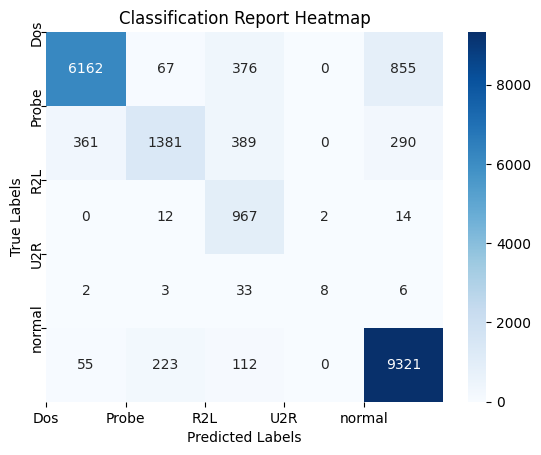

In [ ]:
cm = confusion_matrix(y_test, CNNpredictions)

print("Classification Report:")
report = classification_report(y_test, CNNpredictions, output_dict=True)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(range(len(class_mapping)), list(class_mapping.values()), ha='center')
plt.yticks(range(len(class_mapping)), list(class_mapping.values()), ha='center')
plt.title('Classification Report Heatmap')
plt.show()

In [ ]:
cm

array([[6162,   67,  376,    0,  855],
       [ 361, 1381,  389,    0,  290],
       [   0,   12,  967,    2,   14],
       [   2,    3,   33,    8,    6],
       [  55,  223,  112,    0, 9321]])

In [ ]:
report

{'0': {'precision': 0.9364741641337386,
  'recall': 0.826005361930295,
  'f1-score': 0.8777777777777779,
  'support': 7460},
 '1': {'precision': 0.8190984578884934,
  'recall': 0.570425444031392,
  'f1-score': 0.6725103481860237,
  'support': 2421},
 '2': {'precision': 0.5151838039424613,
  'recall': 0.9718592964824121,
  'f1-score': 0.6733983286908077,
  'support': 995},
 '3': {'precision': 0.8,
  'recall': 0.15384615384615385,
  'f1-score': 0.25806451612903225,
  'support': 52},
 '4': {'precision': 0.8888994850276559,
  'recall': 0.9598393574297188,
  'f1-score': 0.9230083675793433,
  'support': 9711},
 'accuracy': 0.8643345123310238,
 'macro avg': {'precision': 0.7919311821984698,
  'recall': 0.6963951227439943,
  'f1-score': 0.680951867672597,
  'support': 20639},
 'weighted avg': {'precision': 0.87966691288396,
  'recall': 0.8643345123310238,
  'f1-score': 0.8635667776844641,
  'support': 20639}}

##MLP

In [ ]:
train_df['label'] = LabelEncoder().fit_transform(train_df['target'])
test_df['label'] = LabelEncoder().fit_transform(test_df['target'])

y_train = train_df['label']
X_train = train_df.drop(columns=['label', 'target'])

y_test = test_df['label']
X_test = test_df.drop(columns=['label', 'target'])

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(hidden_layer_sizes=(64, 64))

mlp.fit(X_train, y_train)

start_time = time.time()
y_pred_test = mlp.predict(X_test)
end_time = time.time()

print(classification_report(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))

elapsed_time = end_time - start_time
print("Test time:", elapsed_time, "sec")

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      7460
           1       0.82      0.65      0.72      2421
           2       0.58      0.97      0.72       995
           3       0.30      0.27      0.29        52
           4       0.89      0.96      0.92      9711

    accuracy                           0.88     20639
   macro avg       0.71      0.74      0.71     20639
weighted avg       0.89      0.88      0.88     20639

Accuracy: 0.8781917728572121
Tempo decorrido para executar o teste: 0.12672877311706543 segundos


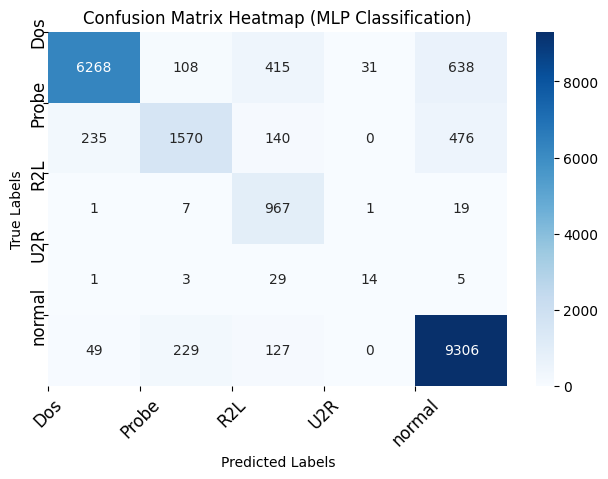

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(range(len(class_mapping)), list(class_mapping.values()), ha='center', rotation=45)
plt.yticks(range(len(class_mapping)), list(class_mapping.values()), ha='center')
plt.title('Confusion Matrix Heatmap (MLP Classification)')

plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
cm

array([[6268,  108,  415,   31,  638],
       [ 235, 1570,  140,    0,  476],
       [   1,    7,  967,    1,   19],
       [   1,    3,   29,   14,    5],
       [  49,  229,  127,    0, 9306]])

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      7460
           1       0.82      0.65      0.72      2421
           2       0.58      0.97      0.72       995
           3       0.30      0.27      0.29        52
           4       0.89      0.96      0.92      9711

    accuracy                           0.88     20639
   macro avg       0.71      0.74      0.71     20639
weighted avg       0.89      0.88      0.88     20639

Accuracy: 0.8781917728572121
Tempo decorrido para executar o teste: 0.12672877311706543 segundos


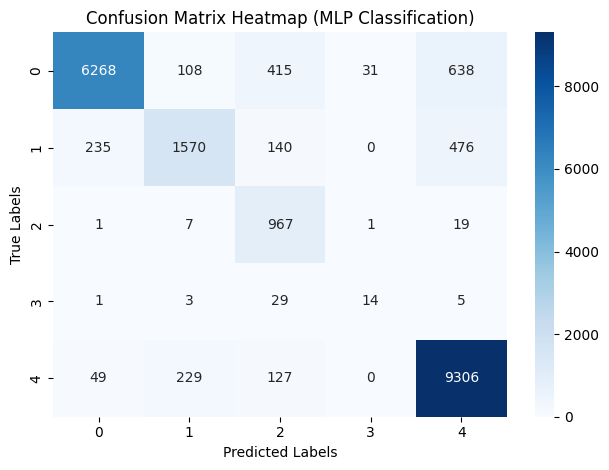

              precision    recall  f1-score       support
0              0.956363  0.840214  0.894534   7460.000000
1              0.818988  0.648492  0.723836   2421.000000
2              0.576281  0.971859  0.723532    995.000000
3              0.304348  0.269231  0.285714     52.000000
4              0.891038  0.958295  0.923443   9711.000000
accuracy       0.878192  0.878192  0.878192      0.878192
macro avg      0.709404  0.737618  0.710212  20639.000000
weighted avg   0.889546  0.878192  0.878335  20639.000000
Geometric Mean Precision: 0.6570
Geometric Mean Recall: 0.6716
Geometric Mean F1-Score: 0.6583


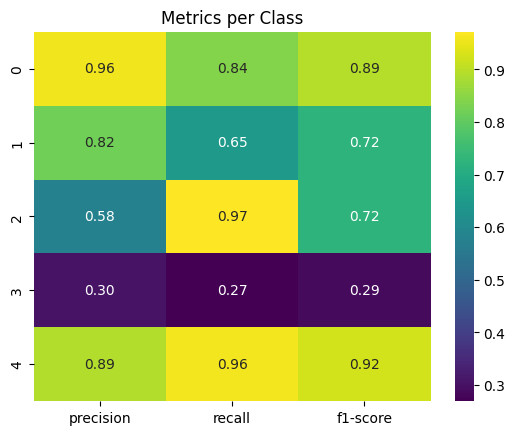

In [ ]:

report = classification_report(y_test, y_pred_test, output_dict=True)
print(classification_report(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))

elapsed_time = end_time - start_time
print("Tempo decorrido para executar o teste:", elapsed_time, "segundos")

cm = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (MLP Classification)')

plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame(report).transpose()
print(metrics_df)

precision = metrics_df.loc[:, 'precision'][:-3]
recall = metrics_df.loc[:, 'recall'][:-3]
f1_score = metrics_df.loc[:, 'f1-score'][:-3]

geom_mean_precision = np.exp(np.mean(np.log(precision)))
geom_mean_recall = np.exp(np.mean(np.log(recall)))
geom_mean_f1_score = np.exp(np.mean(np.log(f1_score)))

print(f"Geometric Mean Precision: {geom_mean_precision:.4f}")
print(f"Geometric Mean Recall: {geom_mean_recall:.4f}")
print(f"Geometric Mean F1-Score: {geom_mean_f1_score:.4f}")

fig, ax = plt.subplots()
sns.heatmap(metrics_df.iloc[:-3, :-1], annot=True, cmap='viridis', ax=ax, fmt='.2f')
plt.title('Metrics per Class')
plt.show()

In [ ]:
cm

array([[6268,  108,  415,   31,  638],
       [ 235, 1570,  140,    0,  476],
       [   1,    7,  967,    1,   19],
       [   1,    3,   29,   14,    5],
       [  49,  229,  127,    0, 9306]])